<a href="https://colab.research.google.com/github/MarouaHY/yolo11/blob/main/yolov11_maroua.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install easyocr
!pip install pytesseract
!pip install matplotlib
!pip install paddleocr
!pip install ultralytics
!pip install opencv-python
!pip install google-colab
!pip install paddlepaddle paddleocr


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 30.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 88.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 69.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 79.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.9/422.9 kB 29.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9

In [3]:
# Import required libraries
import os
import xml.etree.ElementTree as ET
import random
import shutil
import cv2
import easyocr
import pytesseract
import numpy as np
import matplotlib.pyplot as plt
from paddleocr import PaddleOCR
from ultralytics import YOLO
from google.colab.patches import cv2_imshow


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
!unzip "/content/gdrive/MyDrive/archive.zip" -d "/content/"


Archive:  /content/gdrive/MyDrive/archive.zip
  inflating: /content/annotations/Cars0.xml  
  inflating: /content/annotations/Cars1.xml  
  inflating: /content/annotations/Cars10.xml  
  inflating: /content/annotations/Cars100.xml  
  inflating: /content/annotations/Cars101.xml  
  inflating: /content/annotations/Cars102.xml  
  inflating: /content/annotations/Cars103.xml  
  inflating: /content/annotations/Cars104.xml  
  inflating: /content/annotations/Cars105.xml  
  inflating: /content/annotations/Cars106.xml  
  inflating: /content/annotations/Cars107.xml  
  inflating: /content/annotations/Cars108.xml  
  inflating: /content/annotations/Cars109.xml  
  inflating: /content/annotations/Cars11.xml  
  inflating: /content/annotations/Cars110.xml  
  inflating: /content/annotations/Cars111.xml  
  inflating: /content/annotations/Cars112.xml  
  inflating: /content/annotations/Cars113.xml  
  inflating: /content/annotations/Cars114.xml  
  inflating: /content/annotations/Cars115.xml  


In [ ]:
import os
import shutil


# Step 2: Define directories
annotations_dir = "/content/annotations"
images_dir = "/content/images"
labels_dir = "/content/labels"
save_dir = "/content/gdrive/MyDrive/yolo11_results"

# Step 3: Create the destination directory if it doesn't exist
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
if not os.path.exists(labels_dir):
    os.makedirs(labels_dir)
    print(f"Created directory: {labels_dir}")
# Step 4: Check if source directories exist and copy them
directories_to_copy = {
    "annotations": annotations_dir,
    "images": images_dir,
    "labels": labels_dir,
}

for folder_name, source_dir in directories_to_copy.items():
    if os.path.exists(source_dir):
        dest_folder = os.path.join(save_dir, folder_name)
        # Remove existing folder in destination if it exists
        if os.path.exists(dest_folder):
            shutil.rmtree(dest_folder)
        # Copy the folder
        shutil.copytree(source_dir, dest_folder)
        print(f"Copied {folder_name} to {dest_folder}")
    else:
        print(f"Directory {source_dir} does not exist. Skipping...")

print("Process completed. Check Google Drive for the saved folders.")

Copied annotations to /content/gdrive/MyDrive/yolo11_results/annotations
Copied images to /content/gdrive/MyDrive/yolo11_results/images
Copied labels to /content/gdrive/MyDrive/yolo11_results/labels
Process completed. Check Google Drive for the saved folders.


In [ ]:
# Classes dictionary
classes = {"licence": 0}

In [ ]:
# Function to convert Pascal VOC to YOLO format
def convert_voc_to_yolo(xml_file):
    tree = ET.parse(xml_file)
    root = tree.getroot()
    image_filename = root.find("filename").text
    image_path = os.path.join(images_dir, image_filename)
    img_width = int(root.find("size/width").text)
    img_height = int(root.find("size/height").text)
    yolo_annotation = []

    for obj in root.findall("object"):
        class_name = obj.find("name").text
        if class_name not in classes:
            continue
        class_id = classes[class_name]
        bbox = obj.find("bndbox")
        xmin = int(bbox.find("xmin").text)
        ymin = int(bbox.find("ymin").text)
        xmax = int(bbox.find("xmax").text)
        ymax = int(bbox.find("ymax").text)
        x_center = (xmin + xmax) / (2.0 * img_width)
        y_center = (ymin + ymax) / (2.0 * img_height)
        width = (xmax - xmin) / img_width
        height = (ymax - ymin) / img_height
        yolo_annotation.append(f"{class_id} {x_center} {y_center} {width} {height}")

    txt_filename = os.path.join(labels_dir, image_filename.replace(".png", ".txt"))
    with open(txt_filename, "w") as f:
        f.write("\n".join(yolo_annotation))

In [ ]:
# Convert all annotations
for xml_file in os.listdir(annotations_dir):
    if xml_file.endswith(".xml"):
        convert_voc_to_yolo(os.path.join(annotations_dir, xml_file))
print("✅ YOLO annotations saved in /content/labels")

✅ YOLO annotations saved in /content/labels


In [ ]:
from google.colab import drive
import os
import shutil
import random

# Step 1: Mount Google Drive
drive.mount('/content/gdrive')

# Step 2: Define directories
images_dir = "/content/images"
labels_dir = "/content/labels"
save_dir = "/content/gdrive/MyDrive/yolo11_results"

# Step 3: Create the destination directory if it doesn't exist
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Function to split dataset into train and val
def split_dataset():
    train_images_dir = "/content/images/train"
    val_images_dir = "/content/images/val"
    train_labels_dir = "/content/labels/train"
    val_labels_dir = "/content/labels/val"

    # Create train and val directories
    for d in [train_images_dir, val_images_dir, train_labels_dir, val_labels_dir]:
        os.makedirs(d, exist_ok=True)

    # Get list of image files
    image_files = [f for f in os.listdir(images_dir) if f.endswith(".png")]
    random.shuffle(image_files)
    split_index = int(0.8 * len(image_files))
    train_files = image_files[:split_index]
    val_files = image_files[split_index:]

    # Function to move files
    def move_files(file_list, src_img_dir, src_lbl_dir, dst_img_dir, dst_lbl_dir):
        for file in file_list:
            shutil.move(os.path.join(src_img_dir, file), os.path.join(dst_img_dir, file))
            label_file = file.replace(".png", ".txt")
            if os.path.exists(os.path.join(src_lbl_dir, label_file)):
                shutil.move(os.path.join(src_lbl_dir, label_file), os.path.join(dst_lbl_dir, label_file))

    # Move files to train and val directories
    move_files(train_files, images_dir, labels_dir, train_images_dir, train_labels_dir)
    move_files(val_files, images_dir, labels_dir, val_images_dir, val_labels_dir)
    print(f"✅ {len(train_files)} training images")
    print(f"✅ {len(val_files)} validation images")

# Step 4: Split the dataset
split_dataset()

# Step 5: Copy train and val splits to Google Drive
def copy_to_drive(src_dir, dst_dir):
    if os.path.exists(src_dir):
        shutil.copytree(src_dir, dst_dir, dirs_exist_ok=True)
        print(f"Copied {src_dir} to {dst_dir}")
    else:
        print(f"Directory {src_dir} does not exist. Skipping...")

# Copy train and val images and labels to Google Drive
copy_to_drive("/content/images/train", os.path.join(save_dir, "train/images"))
copy_to_drive("/content/images/val", os.path.join(save_dir, "val/images"))
copy_to_drive("/content/labels/train", os.path.join(save_dir, "train/labels"))
copy_to_drive("/content/labels/val", os.path.join(save_dir, "val/labels"))

print("Process completed. Check Google Drive for the saved datasets.")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
✅ 346 training images
✅ 87 validation images
Copied /content/images/train to /content/gdrive/MyDrive/yolo11_results/train/images
Copied /content/images/val to /content/gdrive/MyDrive/yolo11_results/val/images
Copied /content/labels/train to /content/gdrive/MyDrive/yolo11_results/train/labels
Copied /content/labels/val to /content/gdrive/MyDrive/yolo11_results/val/labels
Process completed. Check Google Drive for the saved datasets.


In [19]:
# Create dataset.yaml file
dataset_yaml = """

train: /content/gdrive/MyDrive/yolo11_results/train/images
val: /content/gdrive/MyDrive/yolo11_results/val/images

nc: 3  # Number of classes

names: ["class1", "class2", "class3"]
"""
with open("/content/gdrive/MyDrive/yolo11_results/dataset.yaml", "w") as f:
    f.write(dataset_yaml)
print("✅ dataset.yaml created!")

✅ dataset.yaml created!


In [ ]:
model = YOLO("yolo11n.pt")
print("✅ YOLOv11 model loaded successfully!")


✅ YOLOv11 model loaded successfully!


In [ ]:
!pip install --upgrade ultralytics tensorboard tensorflow

  Using cached tensorboard-2.19.0-py3-none-any.whl.metadata (1.8 kB)


In [ ]:
# Save the best model weights

!cp /content/runs/detect/train/weights/best.pt /content/gdrive/MyDrive/yolo11_results


In [23]:
# Train YOLOv11 model
def train_yolov11():
    model = YOLO("yolo11n.pt")
    print("✅ YOLOv11 model loaded successfully!")
    !yolo task=detect mode=train model=yolo11n.pt data=/content/gdrive/MyDrive/yolo11_results/dataset.yaml epochs=100 imgsz=640 batch=16 device=cpu
    !cp /content/runs/detect/train/weights/best.pt /content/gdrive/MyDrive/yolo11_results


train_yolov11()


✅ YOLOv11 model loaded successfully!
Ultralytics 8.3.75 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (AMD EPYC 7B12)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/gdrive/MyDrive/yolo11_results/dataset.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cpu, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_c

In [31]:
!cp -r /content/runs/ /content/gdrive/MyDrive/yolo11_results/runs2



**Continue Training yolo11**

In [10]:
!ls /content/gdrive/MyDrive/yolo11_results/


annotations  dataset.yaml  images  labels  runs  train	val


In [15]:
!ls /content/gdrive/MyDrive/yolo11_results/train/images
!ls /content/gdrive/MyDrive/yolo11_results/val/images
!ls /content/gdrive/MyDrive/yolo11_results/train/labels
!ls /content/gdrive/MyDrive/yolo11_results/val/labels


Cars0.png    Cars153.png  Cars213.png  Cars267.png  Cars323.png  Cars383.png  Cars4.png
Cars100.png  Cars155.png  Cars214.png  Cars268.png  Cars324.png  Cars384.png  Cars51.png
Cars102.png  Cars157.png  Cars215.png  Cars26.png   Cars325.png  Cars385.png  Cars52.png
Cars103.png  Cars159.png  Cars216.png  Cars270.png  Cars326.png  Cars388.png  Cars54.png
Cars104.png  Cars15.png   Cars217.png  Cars271.png  Cars329.png  Cars389.png  Cars55.png
Cars106.png  Cars160.png  Cars218.png  Cars272.png  Cars32.png	 Cars38.png   Cars57.png
Cars108.png  Cars161.png  Cars219.png  Cars275.png  Cars330.png  Cars391.png  Cars58.png
Cars109.png  Cars164.png  Cars21.png   Cars277.png  Cars331.png  Cars392.png  Cars59.png
Cars10.png   Cars165.png  Cars220.png  Cars279.png  Cars332.png  Cars393.png  Cars5.png
Cars110.png  Cars166.png  Cars221.png  Cars27.png   Cars333.png  Cars395.png  Cars60.png
Cars111.png  Cars168.png  Cars222.png  Cars280.png  Cars334.png  Cars396.png  Cars61.png
Cars112.png  Cars169.png

In [47]:
!apt install tesseract-ocr
!pip install pytesseract


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 20 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (3,530 kB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 124926 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-


0: 640x480 1 class1, 116.6ms
Speed: 4.2ms preprocess, 116.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 480)


[2025/02/18 17:06:30] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_c

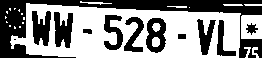

[2025/02/18 17:06:32] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.017469167709350586
[2025/02/18 17:06:32] ppocr DEBUG: cls num  : 1, elapsed : 0.01204371452331543
[2025/02/18 17:06:32] ppocr DEBUG: rec_res num  : 1, elapsed : 0.0430755615234375
EasyOCR Text: WW
PaddleOCR Text: WW - 528-VL
Tesseract Text: WW - 528 - Vic
Final Plate Text: WW - 528 - Vic


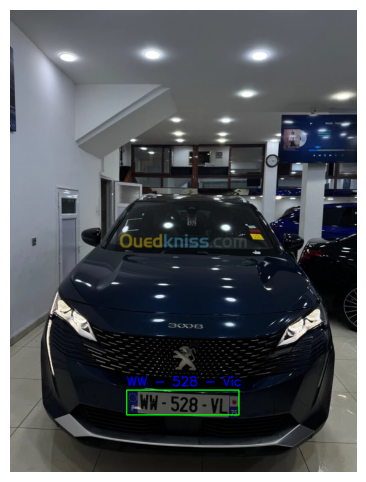

In [48]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO
from easyocr import Reader
from paddleocr import PaddleOCR
import pytesseract
import os
from google.colab.patches import cv2_imshow

# Load YOLO model
model = YOLO("/content/gdrive/MyDrive/yolo11_results/runs2/runs/detect/train2/weights/best.pt")  # Change to your trained YOLO model

# Load the image
image_path = "/content/gdrive/MyDrive/car1.jpg"
if not os.path.exists(image_path):
    raise FileNotFoundError(f"The image path {image_path} does not exist.")

image = cv2.imread(image_path)
if image is None:
    raise ValueError(f"Failed to load the image from {image_path}.")

# Run YOLO detection
results = model(image)

# Initialize OCR models
easyocr_reader = Reader(["en", "fr"])  # EasyOCR
paddleocr_reader = PaddleOCR(use_angle_cls=True, lang="en")  # PaddleOCR

# Function to preprocess the cropped plate for better OCR
def preprocess_plate(plate):
    gray_plate = cv2.cvtColor(plate, cv2.COLOR_BGR2GRAY)
    _, binary_plate = cv2.threshold(gray_plate, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return binary_plate

# Process each detected plate
for result in results:
    for box in result.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])  # Get box coordinates
        cropped_plate = image[y1:y2, x1:x2]  # Crop plate region

        # Preprocess the plate image
        processed_plate = preprocess_plate(cropped_plate)

        # Display the cropped license plate in grayscale
        cv2_imshow(processed_plate)

        # Run OCR (try EasyOCR, PaddleOCR, and Tesseract)
        easy_result = easyocr_reader.readtext(processed_plate)
        paddle_result = paddleocr_reader.ocr(processed_plate)
        tess_result = pytesseract.image_to_string(processed_plate, lang='eng')

        # Extract text (print results to debug)
        easy_text = easy_result[0][1] if easy_result else ""
        paddle_text = paddle_result[0][0][1][0] if paddle_result[0] else ""
        tess_text = tess_result.strip()

        print("EasyOCR Text:", easy_text)
        print("PaddleOCR Text:", paddle_text)
        print("Tesseract Text:", tess_text)

        # Choose the best OCR result
        plate_text = max([easy_text, paddle_text, tess_text], key=len)

        print("Final Plate Text:", plate_text)

        # Draw bounding box on the original image
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

        # Display the plate text at the top of the car image
        text_y = y1 - 10 if y1 - 10 > 10 else y1 + 30  # Adjust if near the top edge
        cv2.putText(image, plate_text, (x1, text_y), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

# Show final image with detected plates & text
plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()


[2025/02/18 17:07:18] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_c

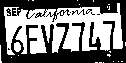

[2025/02/18 17:07:20] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.03806900978088379
[2025/02/18 17:07:20] ppocr DEBUG: cls num  : 1, elapsed : 0.010661125183105469
[2025/02/18 17:07:20] ppocr DEBUG: rec_res num  : 1, elapsed : 0.03849077224731445
PaddleOCR Text: 6FVZ747!


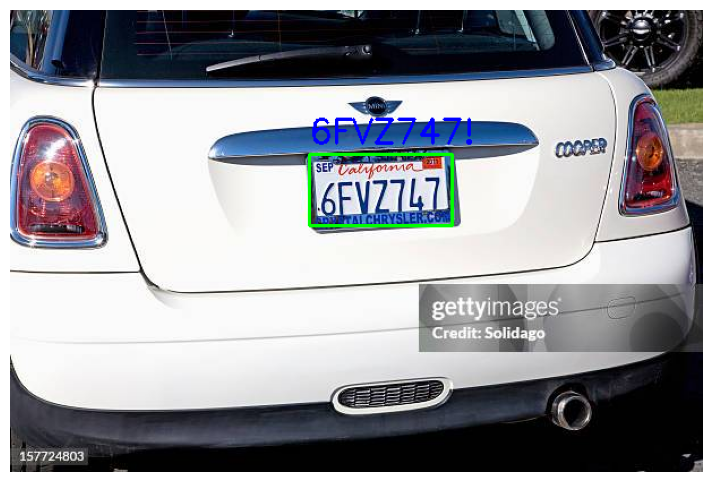

In [49]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO
from paddleocr import PaddleOCR
from google.colab.patches import cv2_imshow
import os

# Set up PaddleOCR
ocr = PaddleOCR(use_angle_cls=True, lang="en")  # Initialize PaddleOCR

# Load YOLO model
model = YOLO("/content/gdrive/MyDrive/yolo11_results/runs2/runs/detect/train2/weights/best.pt")  # Change to your trained YOLO model

# Load the image
image_path = "/content/gdrive/MyDrive/b.jpg"
if not os.path.exists(image_path):
    raise FileNotFoundError(f"The image path {image_path} does not exist.")

image = cv2.imread(image_path)
if image is None:
    raise ValueError(f"Failed to load the image from {image_path}.")

# Run YOLO detection
results = model(image)

# Function to preprocess the cropped plate for better OCR
def preprocess_plate(plate):
    gray_plate = cv2.cvtColor(plate, cv2.COLOR_BGR2GRAY)
    # Apply bilateral filter to remove noise while keeping edges sharp
    filtered_plate = cv2.bilateralFilter(gray_plate, 11, 17, 17)
    _, binary_plate = cv2.threshold(filtered_plate, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return binary_plate

# Function to call PaddleOCR
def paddleocr_detection(image):
    result = ocr.ocr(image)
    if result:
        return ' '.join([line[1][0] for line in result[0]])
    return ""

# Process each detected plate
for result in results:
    for box in result.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])  # Get box coordinates
        cropped_plate = image[y1:y2, x1:x2]  # Crop plate region

        # Preprocess the plate image
        processed_plate = preprocess_plate(cropped_plate)

        # Display the cropped license plate in grayscale
        cv2_imshow(processed_plate)

        # Run PaddleOCR
        plate_text = paddleocr_detection(processed_plate)

        print("PaddleOCR Text:", plate_text)

        # Draw bounding box on the original image
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

        # Display the plate text at the top of the car image
        text_y = y1 - 10 if y1 - 10 > 10 else y1 + 30  # Adjust if near the top edge
        cv2.putText(image, plate_text, (x1, text_y), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

# Show final image with detected plates & text
plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()
